In [1]:
import sys
sys.path.append("../../") # gruppe_3 als lib dir

# ----------------------------------------------------------------------------------------
# VORSICHT: Änderungen an gruppe_3 - Files erfordern womöglich einen Jupyter-Neustart
# ----------------------------------------------------------------------------------------

import os

from gruppe_3.dataset import DatasetReader, InputMode
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ----------------------------------------------------------------------------------------
# werden die Parameter nach dem InputMode weggelassen, so werden alle Dateien im Ziel-
# verzeichnis gelesen. Letzteres wird durch eine Umgebungsvariable adressiert, damit
# alle entspannt ins Git pushen können.
# ----------------------------------------------------------------------------------------

dataset_reader = DatasetReader(
    os.environ.get('EXTRA_SENSORY_DATASET'),
    InputMode.users
)

X, y = dataset_reader.read()
y = y[['label:LOC_main_workplace', 'label:OR_indoors', 'label:ON_A_BUS',
       'label:DRIVE_-_I_M_THE_DRIVER', 'label:DRIVE_-_I_M_A_PASSENGER',
       'label:LOC_home', 'label:SHOPPING', 'label:STROLLING',
       'label:DRINKING__ALCOHOL_', 'label:CLEANING', 'label:WASHING_DISHES',
       'label:WATCHING_TV', 'label:SURFING_THE_INTERNET', 'label:LOC_beach',
       'label:SINGING', 'label:TALKING', 'label:COMPUTER_WORK', 'label:EATING',
       'label:TOILET', 'label:GROOMING', 'label:DRESSING',
       'label:STAIRS_-_GOING_UP', 'label:STAIRS_-_GOING_DOWN',
       'label:AT_SCHOOL', 'label:WITH_CO-WORKERS', 'label:WITH_FRIENDS']].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


D:\Development\Projects\mustererkennung\data\00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv
D:\Development\Projects\mustererkennung\data\098A72A5-E3E5-4F54-A152-BBDA0DF7B694.features_labels.csv
D:\Development\Projects\mustererkennung\data\0A986513-7828-4D53-AA1F-E02D6DF9561B.features_labels.csv
D:\Development\Projects\mustererkennung\data\0BFC35E2-4817-4865-BFA7-764742302A2D.features_labels.csv
D:\Development\Projects\mustererkennung\data\0E6184E1-90C0-48EE-B25A-F1ECB7B9714E.features_labels.csv
D:\Development\Projects\mustererkennung\data\1155FF54-63D3-4AB2-9863-8385D0BD0A13.features_labels.csv
D:\Development\Projects\mustererkennung\data\11B5EC4D-4133-4289-B475-4E737182A406.features_labels.csv
D:\Development\Projects\mustererkennung\data\136562B6-95B2-483D-88DC-065F28409FD2.features_labels.csv
D:\Development\Projects\mustererkennung\data\1538C99F-BA1E-4EFB-A949-6C7C47701B20.features_labels.csv
D:\Development\Projects\mustererkennung\data\1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ("a", SimpleImputer()),
    ("b", StandardScaler()),
    ("classify", RandomForestClassifier(
        verbose=True,
        n_jobs=-1,
        n_estimators=100,
        random_state=42
    ))
])

y_pred = clf.fit(X_train,y_train).predict(X_test)
accuracy_score(y_test,y_pred)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min


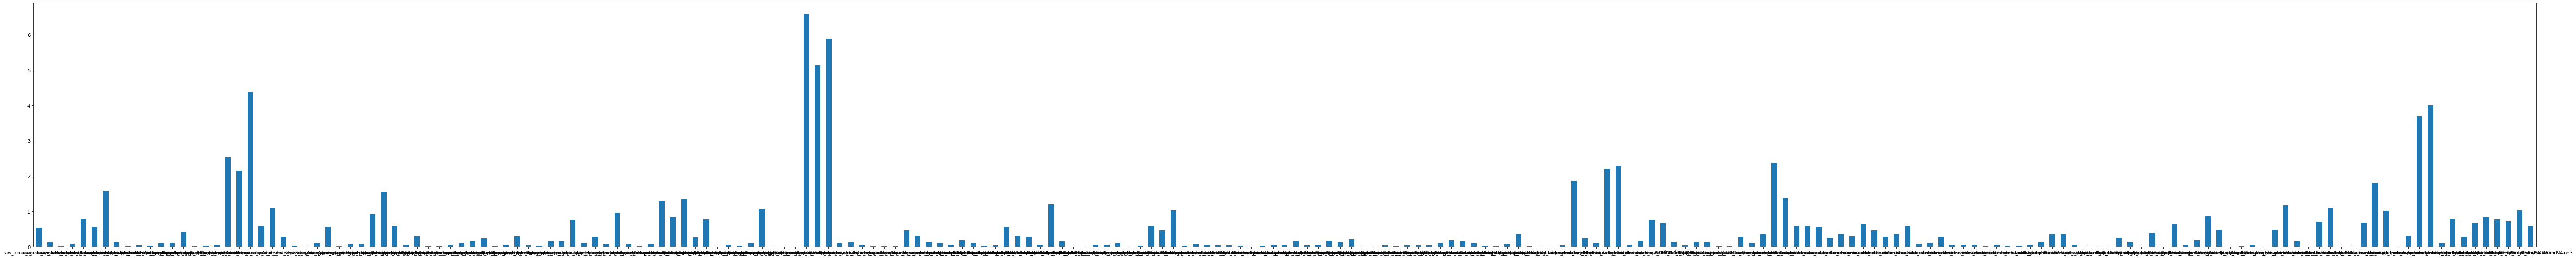

In [10]:
from catboost import Pool
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [100, 10]

cat_boost = clf.named_steps['classify']
importance=pd.Series(cat_boost.get_feature_importance(Pool(X_test, label=y_test)),index=X_test.columns,name="importance")
importance.plot.bar(y='importance',rot=0)
